Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Desktop/Graded Assignments/Uber Request Data.csv') #reading the csv file

In [3]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
df.isnull().sum(axis=0) #Inspecting the null values

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [5]:
df.loc[(df['Status']=='Cancelled'),:].shape

(1264, 6)

In [6]:
df.loc[(df['Status']=='No Cars Available'),:].shape

(2650, 6)

In [7]:
1264+2650 #This value is equal to the number of NA values in column 'Drop timestamp'

3914

Driver id is not available only for unavailable cars=2650

#### The dataframe as such does not need any removal of rows or columns and inferences can be made by subsetting the dataframe later on

In [8]:
#Inspecting the data type
df['Request timestamp'].dtype 

dtype('O')

In [9]:
df['Drop timestamp'].dtype 

dtype('O')

In [10]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [11]:
df['Request timestamp']=df['Request timestamp'].apply(lambda x:x.replace('/7/','-07-')) #Converting to the right format

In [12]:
df['Request timestamp']=pd.to_datetime(df['Request timestamp'],dayfirst=True) #Changing the data type to datetime

In [13]:
df['Request date']=df['Request timestamp'].dt.date #Extracting the date

In [14]:
df['Request time']=df['Request timestamp'].dt.time #Extracting the time

In [15]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,2016-07-11,11:51:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,2016-07-11,17:57:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,2016-07-12,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,2016-07-12,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,2016-07-13,08:33:16
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59,2016-07-13,21:57:28
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15,2016-07-14,06:15:32
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,15-07-2016 06:07:52,2016-07-15,05:11:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,15-07-2016 18:50:51,2016-07-15,17:57:27
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,11/7/2016 7:25,2016-07-11,06:46:00


In [16]:
df['Request time'].dtype

dtype('O')

In [17]:
time_split=df['Request time'].astype(str).str.split(":",n=-1,expand=True) #Splitting the column to get hours and minutes as separate columns

In [18]:
time_split

,0,1,2
0,11,51,00
1,17,57,00
2,09,17,00
3,21,08,00
4,08,33,16
5,21,57,28
6,06,15,32
7,05,11,52
8,17,57,27
9,06,46,00


In [19]:
df['Request_Hour']=time_split.iloc[:,0] #Deriving a new column

In [20]:
df['Request_Minute']=time_split.iloc[:,1] #Deriving a new column

In [21]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Request_Hour,Request_Minute
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,2016-07-11,11:51:00,11,51
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,2016-07-11,17:57:00,17,57
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,2016-07-12,09:17:00,09,17
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,2016-07-12,21:08:00,21,08
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,2016-07-13,08:33:16,08,33


In [22]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
Request date            0
Request time            0
Request_Hour            0
Request_Minute          0
dtype: int64

In [23]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Request_Hour,Request_Minute
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,2016-07-11,11:51:00,11,51
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,2016-07-11,17:57:00,17,57
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,2016-07-12,09:17:00,09,17
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,2016-07-12,21:08:00,21,08
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,2016-07-13,08:33:16,08,33


In [24]:
df_drop=df[~df['Drop timestamp'].isnull()] #Ignoring null values for operations on 'Drop timestamp'

In [25]:
df_drop

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Request_Hour,Request_Minute
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,2016-07-11,11:51:00,11,51
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,2016-07-11,17:57:00,17,57
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,2016-07-12,09:17:00,09,17
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,2016-07-12,21:08:00,21,08
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,2016-07-13,08:33:16,08,33
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59,2016-07-13,21:57:28,21,57
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15,2016-07-14,06:15:32,06,15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,15-07-2016 06:07:52,2016-07-15,05:11:52,05,11
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,15-07-2016 18:50:51,2016-07-15,17:57:27,17,57
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,11/7/2016 7:25,2016-07-11,06:46:00,06,46


In [26]:
df_drop['Drop timestamp']=df_drop['Drop timestamp'].apply(lambda x:x.replace('/7/','-07-')) #Getting the right format

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_drop

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Request_Hour,Request_Minute
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11-07-2016 13:00,2016-07-11,11:51:00,11,51
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11-07-2016 18:47,2016-07-11,17:57:00,17,57
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12-07-2016 9:58,2016-07-12,09:17:00,09,17
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12-07-2016 22:03,2016-07-12,21:08:00,21,08
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,2016-07-13,08:33:16,08,33
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59,2016-07-13,21:57:28,21,57
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15,2016-07-14,06:15:32,06,15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,15-07-2016 06:07:52,2016-07-15,05:11:52,05,11
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,15-07-2016 18:50:51,2016-07-15,17:57:27,17,57
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,11-07-2016 7:25,2016-07-11,06:46:00,06,46


In [28]:
df_drop['Drop timestamp'].dtype

dtype('O')

In [29]:
df_drop.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Request_Hour,Request_Minute
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11-07-2016 13:00,2016-07-11,11:51:00,11,51
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11-07-2016 18:47,2016-07-11,17:57:00,17,57
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12-07-2016 9:58,2016-07-12,09:17:00,09,17
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12-07-2016 22:03,2016-07-12,21:08:00,21,08
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,2016-07-13,08:33:16,08,33
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59,2016-07-13,21:57:28,21,57
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15,2016-07-14,06:15:32,06,15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,15-07-2016 06:07:52,2016-07-15,05:11:52,05,11
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,15-07-2016 18:50:51,2016-07-15,17:57:27,17,57
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,11-07-2016 7:25,2016-07-11,06:46:00,06,46


In [30]:
df_drop['Drop timestamp']=pd.to_datetime(df_drop['Drop timestamp'],dayfirst=True) #Changing the data type to datetime

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_drop['Drop date']=df_drop['Drop timestamp'].dt.date #Extracting the date

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_drop['Drop time']=df_drop['Drop timestamp'].dt.time #Extracting the time

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
time_split2=df_drop['Drop time'].astype(str).str.split(':',n=-1,expand=True) #Splitting the column to derive new columns

In [34]:
df_drop['Drop hour']=time_split2.iloc[:,0]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_drop['Drop minute']=time_split2.iloc[:,1]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
#Adding the formatted and derived columns to the main dataframe
df['Drop timestamp']=df_drop['Drop timestamp']

In [37]:
df['Drop date']=df_drop['Drop date']

In [38]:
df['Drop hour']=df_drop['Drop hour']

In [39]:
df['Drop minute']=df_drop['Drop minute']

In [40]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Request_Hour,Request_Minute,Drop date,Drop hour,Drop minute
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,51,2016-07-11,13,00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,57,2016-07-11,18,47
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,09,17,2016-07-12,09,58
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,08,2016-07-12,22,03
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,08,33,2016-07-13,09,25
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,21,57,2016-07-13,22,28
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,06,15,2016-07-14,07,13
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,05,11,2016-07-15,06,07
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,17,57,2016-07-15,18,50
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,06,46,2016-07-11,07,25


In [41]:
df['Request_Hour']=pd.to_numeric(df['Request_Hour']) #Changing the data type to numeric

In [42]:
df['Request_Minute']=pd.to_numeric(df['Request_Minute']) #''

In [43]:
df['Drop hour']=pd.to_numeric(df['Drop hour']) #''

In [44]:
df['Drop minute']=pd.to_numeric(df['Drop minute']) #''

In [45]:
#Deriving the column for durations of the trips
df['Duration']=abs(((df['Drop hour']*60)+(df['Drop minute']))-((df['Request_Hour']*60)+(df['Request_Minute']))) 

In [46]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Request_Hour,Request_Minute,Drop date,Drop hour,Drop minute,Duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,51,2016-07-11,13.0,0.0,69.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,57,2016-07-11,18.0,47.0,50.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,17,2016-07-12,9.0,58.0,41.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,8,2016-07-12,22.0,3.0,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,33,2016-07-13,9.0,25.0,52.0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,21,57,2016-07-13,22.0,28.0,31.0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,6,15,2016-07-14,7.0,13.0,58.0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,5,11,2016-07-15,6.0,7.0,56.0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,17,57,2016-07-15,18.0,50.0,53.0
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,6,46,2016-07-11,7.0,25.0,39.0


In [47]:
#Defining a function that decides the time frame
def timeframe(df):
    if df['Request_Hour']>=0 and df['Request_Hour']<2:
        return 'Early Overnight'
    if df['Request_Hour']>=2 and df['Request_Hour']<4:
        return 'Mid Overnight'
    if df['Request_Hour']>=4 and df['Request_Hour']<6:
        return 'Late Overnight'
    if df['Request_Hour']>=6 and df['Request_Hour']<8:
        return 'Early Morning'
    if df['Request_Hour']>=8 and df['Request_Hour']<10:
        return 'Mid Morning'
    if df['Request_Hour']>=10 and df['Request_Hour']<12:
        return 'Late Morning'
    if df['Request_Hour']>=12 and df['Request_Hour']<14:
        return 'Early Afternoon'
    if df['Request_Hour']>=14 and df['Request_Hour']<16:
        return 'Mid Afternoon'
    if df['Request_Hour']>=16 and df['Request_Hour']<18:
        return 'Late Afternoon'
    if df['Request_Hour']>=18 and df['Request_Hour']<20:
        return 'Early Evening'
    if df['Request_Hour']>=20 and df['Request_Hour']<22:
        return 'Mid Evening'
    if df['Request_Hour']>=22 and df['Request_Hour']<24:
        return 'Late Evening'

In [48]:
df['Time Frame']=df.apply(lambda df:timeframe(df),axis=1) #Applying the defined function to the data frame and deriving the time frame column

In [49]:
df #Inspecting changes

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Request_Hour,Request_Minute,Drop date,Drop hour,Drop minute,Duration,Time Frame
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,51,2016-07-11,13.0,0.0,69.0,Late Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,57,2016-07-11,18.0,47.0,50.0,Late Afternoon
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,17,2016-07-12,9.0,58.0,41.0,Mid Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,8,2016-07-12,22.0,3.0,55.0,Mid Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,33,2016-07-13,9.0,25.0,52.0,Mid Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,21,57,2016-07-13,22.0,28.0,31.0,Mid Evening
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,6,15,2016-07-14,7.0,13.0,58.0,Early Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,5,11,2016-07-15,6.0,7.0,56.0,Late Overnight
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,17,57,2016-07-15,18.0,50.0,53.0,Late Afternoon
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,6,46,2016-07-11,7.0,25.0,39.0,Early Morning


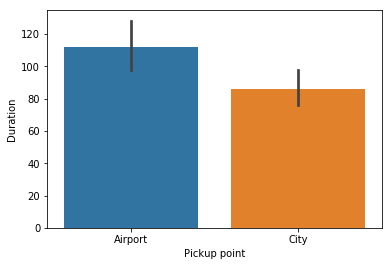

In [50]:
#Plotting the average duration of the completed trips from two different pickup points
sns.barplot(x='Pickup point',y='Duration',data=df)


### Observation 1
The difference in the Average duration in around 30 minutes.This implies that drivers are having to wait for an average of 30 minutes outside the airport before the passenger finally comes or maybe another reasons

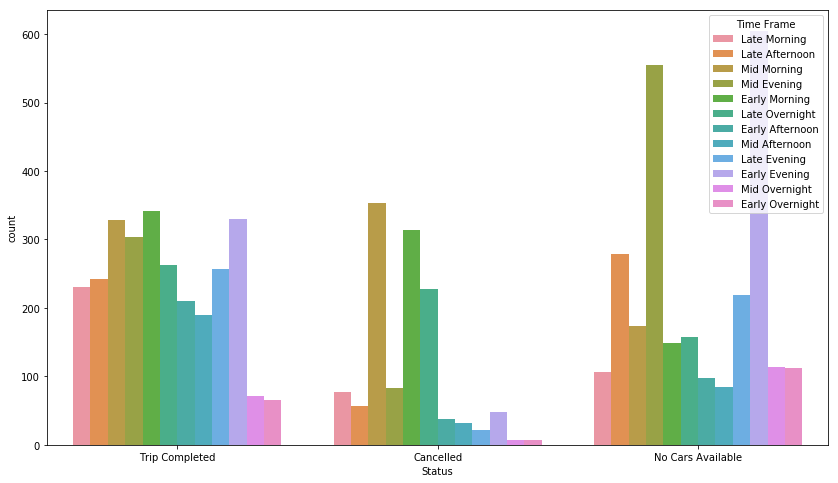

In [51]:
# Comparing the frequency of different statuses across various time frames of the day
plt.figure(figsize=(14,8))
sns.countplot(x='Status',hue='Time Frame',data=df)

### Observation 2
The unavailability of cars peaks at Early Evening,Mid Evening (6pm-10pm)and is moderately high in the late afternoon.
Cancellation of rides is a prime issue during Early Morning,Mid Morning(6am-10am) and is moderately high during late overnight.

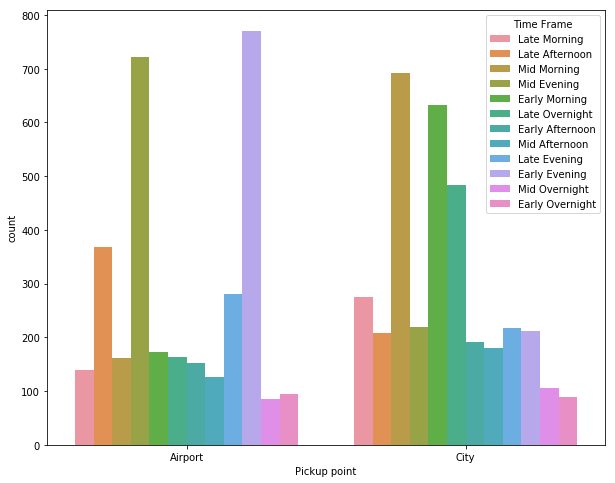

In [52]:
#Comparing the two pickup point requests across various time frames of the day
plt.figure(figsize=(10,8))
sns.countplot(x='Pickup point',hue='Time Frame',data=df)

### Observation 3
Requests coming from Airport are at peak during Early Evening and Mid Evening,which are also the time frames of maximum
unavailability of cars.
Requests from City are at peak during Early Morning and Mid Morning,which are the time frames of maximum cancellation by driver

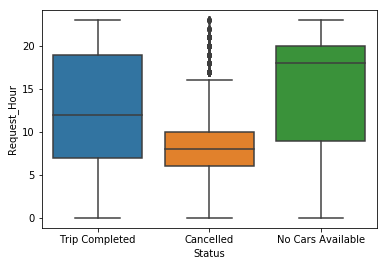

In [53]:
#Checking the distribution of requests for for all the three statuses for confirmation of observation
sns.boxplot(x='Status',y='Request_Hour',data=df)

50% of cancellations are during morning.50% of the times when no car is available is after late afternoon.

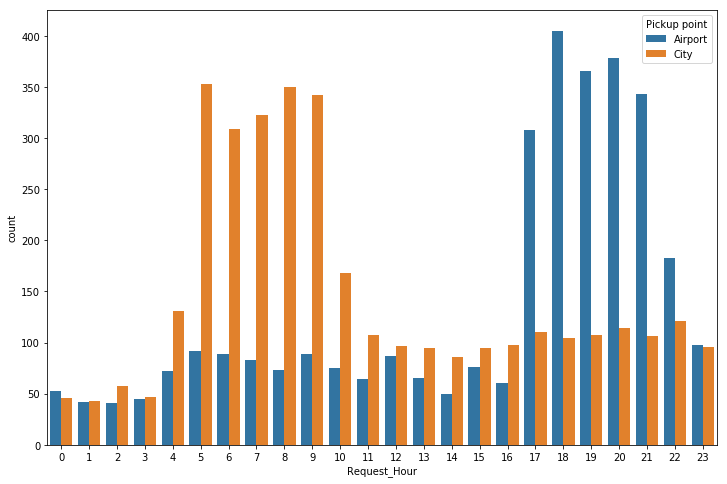

In [54]:
#Comparing City requests against Airport requests across the hours of the day
plt.figure(figsize=(12,8))
sns.countplot(x='Request_Hour',hue='Pickup point',data=df)

### Observation 4
City requests start picking up at around 4am in the morning and exceed Airport requests till late afternoon.From 4pm in the late afternoon the requests from Airport start picking up and exceed the City requests for almost rest of the day

In [55]:
# Creating a pivot table for aggregating the measures
k=df.pivot_table(index = 'Request_Hour',columns = 'Status', aggfunc = 'count')['Request id'] 

In [56]:
k.index.name=None

In [57]:
k

Status,Cancelled,No Cars Available,Trip Completed
0,3,56,40
1,4,56,25
2,5,57,37
3,2,56,34
4,51,74,78
5,176,84,185
6,145,86,167
7,169,63,174
8,178,90,155
9,175,83,173


In [58]:
k=k.rename_axis(None,axis=1)
k=k.rename_axis('Hour of request',axis=0)

In [59]:
k['Total Requests']=k['Cancelled']+k['No Cars Available']+k['Trip Completed'] #Deriving new metric 
k['Demand-Supply Gap']=k['Total Requests']-k['Trip Completed']

([<matplotlib.axis.XTick at 0x465e7eebe0>,
 <a list of 24 Text xticklabel objects>)

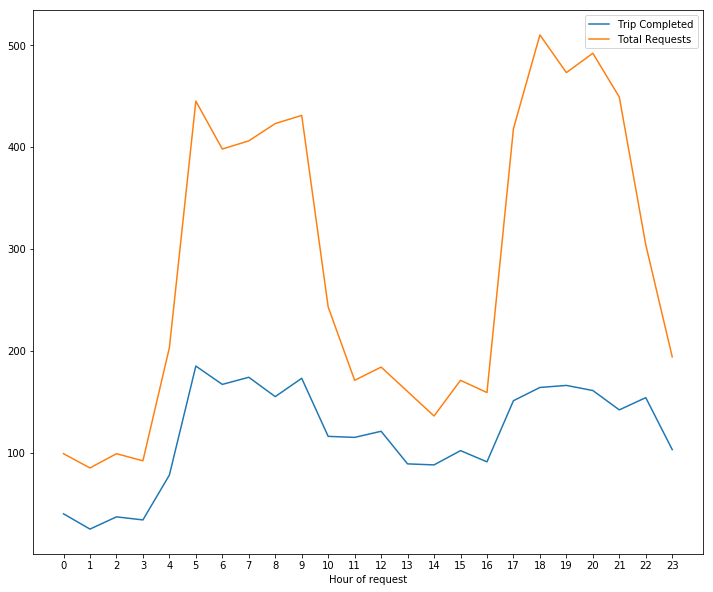

In [60]:
#Comparing Demand and Supply gap across different hours of the day through lineplots to check continuity in variation
k.plot(y=['Trip Completed','Total Requests'],use_index=True,figsize=(12,10))
plt.xticks(np.arange(0,24,step=1))# Definig x axis

Text(0.5,1,'Demand-Supply Gap variation')

<Figure size 1008x1008 with 0 Axes>

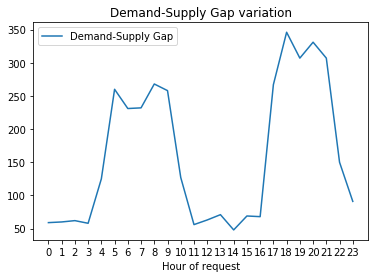

In [61]:
plt.figure(figsize=(14,14))
k.plot(y='Demand-Supply Gap',use_index=True)
plt.xticks(np.arange(0,24,step=1))
plt.title('Demand-Supply Gap variation')

count     24.000000
mean     163.083333
std      107.255857
min       48.000000
25%       62.750000
50%      126.000000
75%      261.750000
max      346.000000
Name: Demand-Supply Gap, dtype: float64


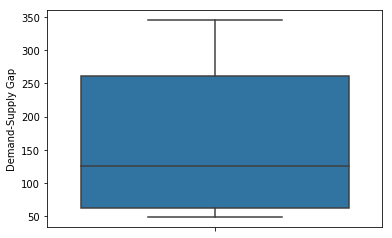

In [62]:
#Inspecting the statistics of demand and supply
sns.boxplot(y='Demand-Supply Gap',data=k)
print (k['Demand-Supply Gap'].describe())

#### Note that the Total Request represents the demand of any particular hour and Trip Completed represents the supply

### Observation 5
The maximum gap exists during morning and evening hours.Those are the periods of maximum cancellations and maximum unavailability of cars.

In [63]:
l=df[df['Pickup point']=='Airport'] #Susbsetting the dataframe for pickup point specific analysis and then following same process

In [64]:
l=l.pivot_table(index = 'Request_Hour',columns = 'Status', aggfunc = 'count')['Request id']

In [65]:
l['Total Requests']=l['Cancelled']+l['No Cars Available']+l['Trip Completed'] #New Column

Text(0.5,1,'Demand-Supply,Airport to City')

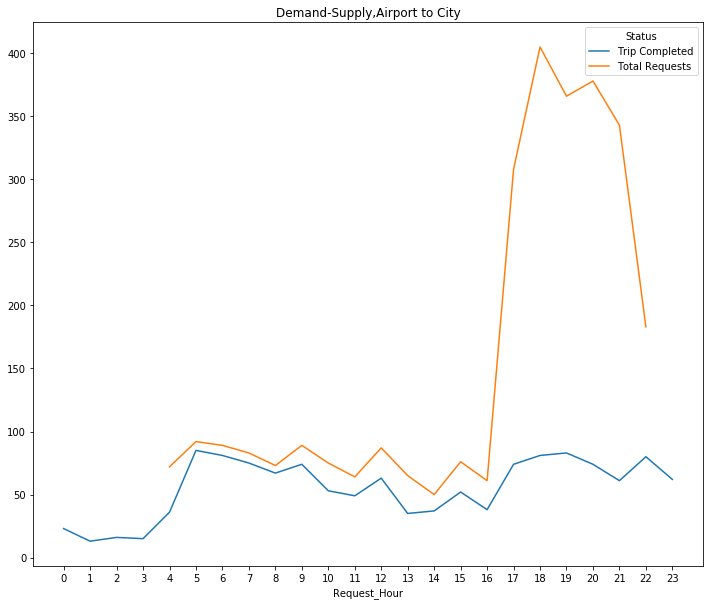

In [66]:
# Defining the plot to compare the Demand Supply gap for Airport to City requests
l.plot(y=['Trip Completed','Total Requests'],use_index=True,figsize=(12,10))
plt.xticks(np.arange(0,24,step=1))
plt.title('Demand-Supply,Airport to City')

### Observation 6
The Demand Supply Gap follows a normal trend till 4 pm in the evening and the the gap suddenly increses after 5 pm.This is the time when the requests from Airport starts increasing.The gap is maximum during Early Evening. 

Text(0.5,1,'Demand-Supply,City to Airport')

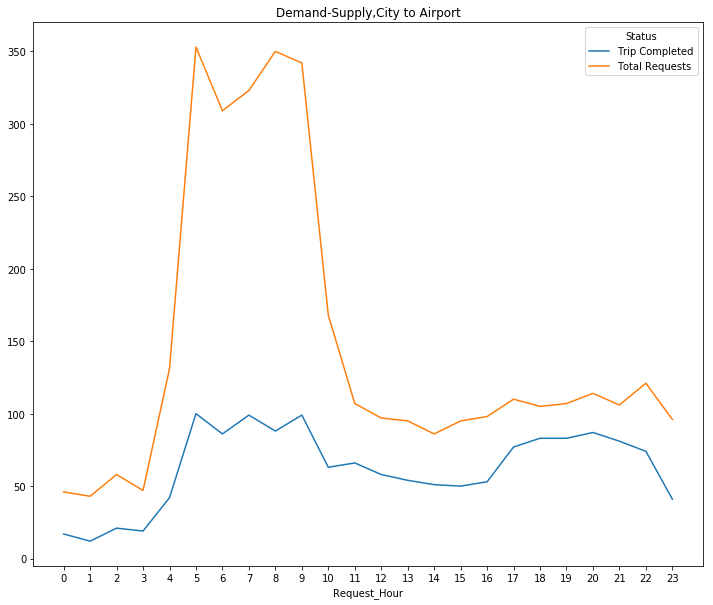

In [67]:
# Defining the plot to compare the Demand Supply gap for City to Airport requests
m=df[df['Pickup point']=='City']
m=m.pivot_table(index = 'Request_Hour',columns = 'Status', aggfunc = 'count')['Request id']
m['Total Requests']=m['Cancelled']+m['No Cars Available']+m['Trip Completed']
m.plot(y=['Trip Completed','Total Requests'],use_index=True,figsize=(12,10))
plt.xticks(np.arange(0,24,step=1))
plt.title('Demand-Supply,City to Airport')

### Observation 7
The gap suddenly increases after 4 am in the morning and the reaches a peak value of around 250 at 5 am.The gap normalises at around 11 am in the late morning when the city requests decreases.

([<matplotlib.axis.XTick at 0x465f2b9828>,
 <a list of 24 Text xticklabel objects>)

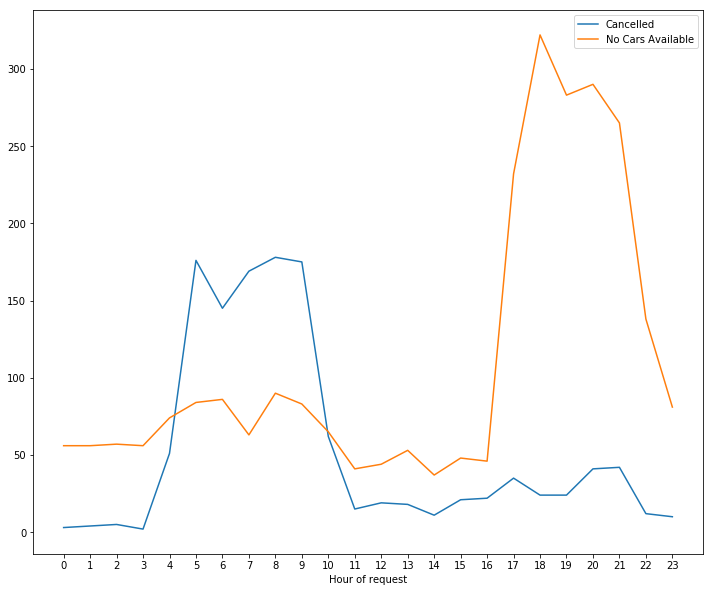

In [68]:
# Comparing the issues to draw conclusions
k.plot(y=['Cancelled','No Cars Available'],use_index=True,figsize=(12,10))
plt.xticks(np.arange(0,24,step=1))

The Chart compares the status hour by hour precisely based on data

Conclusions and solutions are talked about in the presentation.